In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('data/GAMES.csv')
len(df)

19781

In [32]:
df.columns

Index(['game_id', '1_opener_fip', '1_opener_freshness', '1_others_fip',
       '1_others_freshness', '1_woba', '1_ooa', '1_home', '1_team',
       '1_is_wildcard', '2_opener_fip', '2_opener_freshness', '2_others_fip',
       '2_others_freshness', '2_woba', 'w_ooa', '2_team', '2_is_wildcard',
       'is_playoff', 'result'],
      dtype='object')

array([[<Axes: xlabel='1_opener_fip', ylabel='1_opener_fip'>,
        <Axes: xlabel='1_opener_freshness', ylabel='1_opener_fip'>,
        <Axes: xlabel='1_woba', ylabel='1_opener_fip'>,
        <Axes: xlabel='result', ylabel='1_opener_fip'>],
       [<Axes: xlabel='1_opener_fip', ylabel='1_opener_freshness'>,
        <Axes: xlabel='1_opener_freshness', ylabel='1_opener_freshness'>,
        <Axes: xlabel='1_woba', ylabel='1_opener_freshness'>,
        <Axes: xlabel='result', ylabel='1_opener_freshness'>],
       [<Axes: xlabel='1_opener_fip', ylabel='1_woba'>,
        <Axes: xlabel='1_opener_freshness', ylabel='1_woba'>,
        <Axes: xlabel='1_woba', ylabel='1_woba'>,
        <Axes: xlabel='result', ylabel='1_woba'>],
       [<Axes: xlabel='1_opener_fip', ylabel='result'>,
        <Axes: xlabel='1_opener_freshness', ylabel='result'>,
        <Axes: xlabel='1_woba', ylabel='result'>,
        <Axes: xlabel='result', ylabel='result'>]], dtype=object)

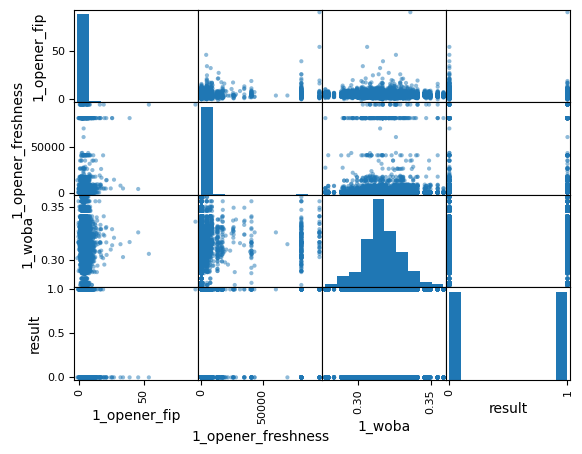

In [4]:
pd.plotting.scatter_matrix(df[['1_opener_fip', '1_opener_freshness', '1_woba', 'result']])

In [5]:
df['1_opener_freshness_days'] = df['1_opener_freshness'] / 3600
df['1_others_freshness_days'] = df['1_others_freshness'] / 3600

## Inspection of FIP and Freshness

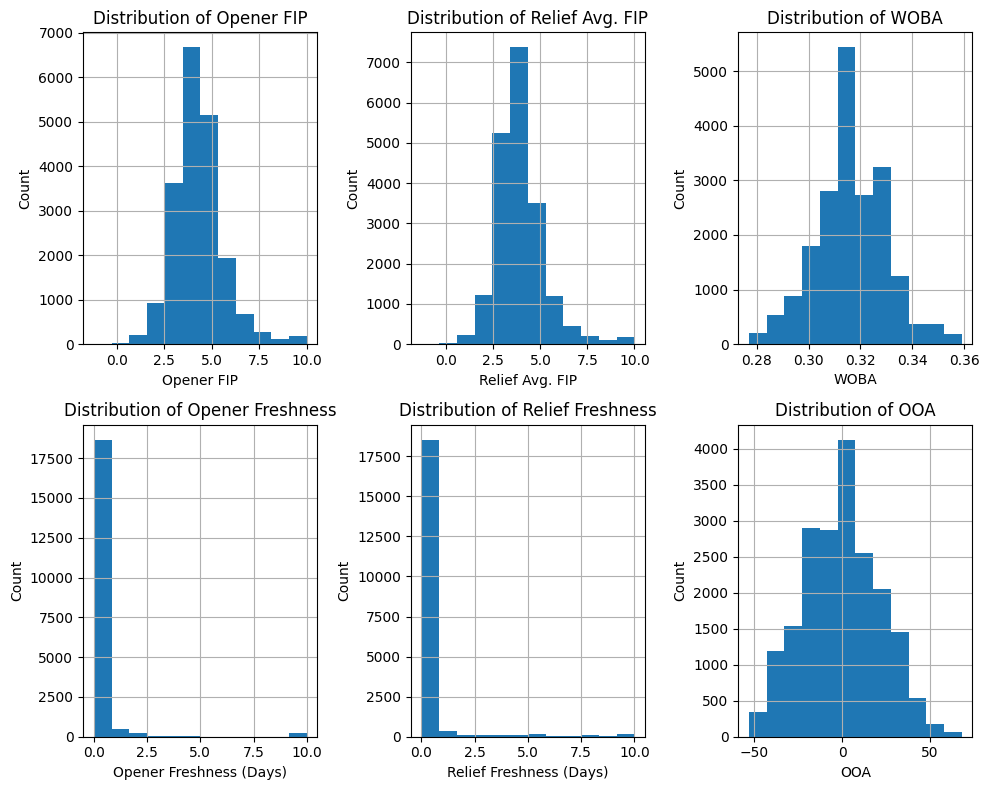

In [23]:
features = ['1_opener_fip', '1_others_fip', '1_woba', '1_opener_freshness_days', '1_others_freshness_days', '1_ooa']
titles = ['Opener FIP', 'Relief Avg. FIP', 'WOBA', 'Opener Freshness', 'Relief Freshness', 'OOA']
xlabels = ['Opener FIP', 'Relief Avg. FIP', 'WOBA', 'Opener Freshness (Days)', 'Relief Freshness (Days)', 'OOA']

df['1_opener_fip'] = df['1_opener_fip'].clip(upper=10)
df['1_others_fip'] = df['1_others_fip'].clip(upper=10)

df['1_opener_freshness_days'] = df['1_opener_freshness_days'].clip(upper=10)
df['1_others_freshness_days'] = df['1_others_freshness_days'].clip(upper=10)

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

for ax, feat, title, lab in zip(axs, features, titles, xlabels):
    df[feat].hist(bins=12, ax=ax)
    ax.set_title(f"Distribution of {title}")
    ax.set_xlabel(lab)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

# Correlation with result

/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_21348/1736042696.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_21348/1736042696.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_21348/1736042696.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(
/var/folders/wr/r6hg44b10dg14yjtwqb4rht80000gn/T/ipykernel_21348/1736042696.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; 

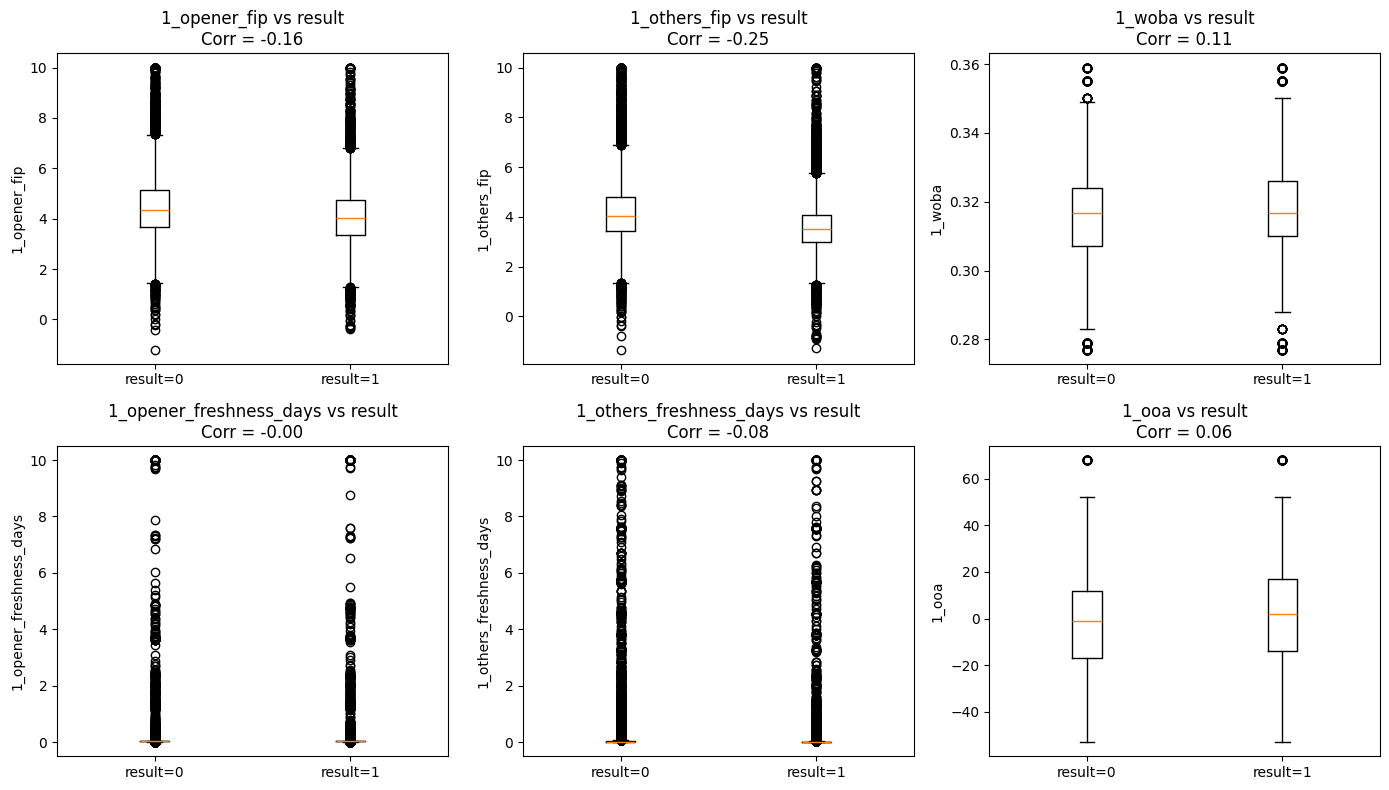

In [7]:
features = ['1_opener_fip', '1_others_fip', '1_woba', '1_opener_freshness_days', '1_others_freshness_days', '1_ooa']

fig, axs = plt.subplots(2, 3, figsize=(14, 8))
axs = axs.ravel()

target = 'result'

for ax, feat in zip(axs, features):
    # Drop NaNs for correlation and plotting
    sub = df[[feat, target]].dropna()
    
    if sub.empty:
        ax.set_title(f"{feat}\n(no data)")
        ax.axis('off')
        continue
    
    # Compute Pearson correlation (point-biserial since target is 0/1)
    corr = sub[[feat, target]].corr().loc[feat, target]
    
    # Prepare data for boxplot: feature values for each target class
    vals_0 = sub.loc[sub[target] == 0, feat]
    vals_1 = sub.loc[sub[target] == 1, feat]
    
    ax.boxplot(
        [vals_0, vals_1],
        labels=[f"{target}=0", f"{target}=1"],
        showfliers=True
    )
    ax.set_title(f"{feat} vs {target}\nCorr = {corr:.2f}")
    ax.set_ylabel(feat)

plt.tight_layout()
plt.show()

## Diff correlation

In [8]:
import sys
print(sys.executable)

/Users/jackson/Documents/GitHub/snare_algo/venv/bin/python


In [9]:
import statsmodels.api as sm

<Axes: xlabel='diff_opener_fip', ylabel='result'>

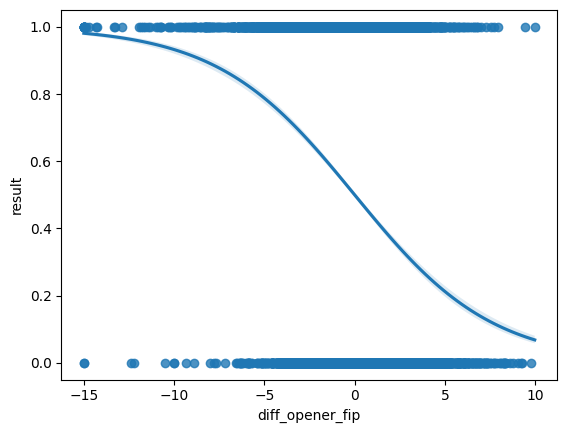

In [12]:
df['diff_opener_fip'] = df['1_opener_fip'] - df['2_opener_fip']
df['diff_opener_fip'] = df['diff_opener_fip'].clip(lower=-15, upper=15)
df['diff_opener_freshness'] = df['1_opener_freshness'] - df['2_opener_freshness']
df['diff_woba'] = df['1_woba'] - df['2_woba']
df['diff_ooa'] = df['1_ooa'] - df['w_ooa']

import seaborn as sns
sns.regplot(x='diff_opener_fip', y='result', data = df, logistic=True)


<Axes: xlabel='diff_woba', ylabel='result'>

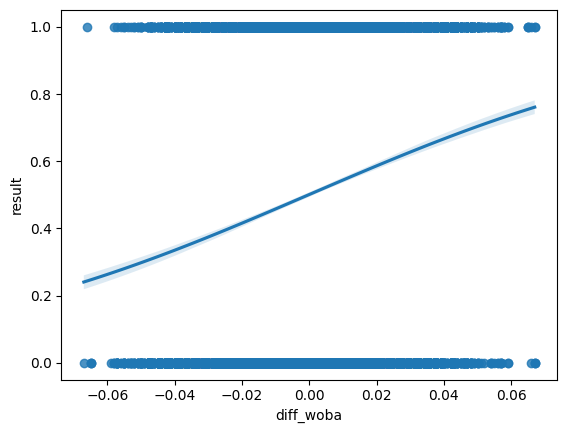

In [14]:
sns.regplot(x='diff_woba', y='result', data = df, logistic=True)

<Axes: xlabel='diff_ooa', ylabel='result'>

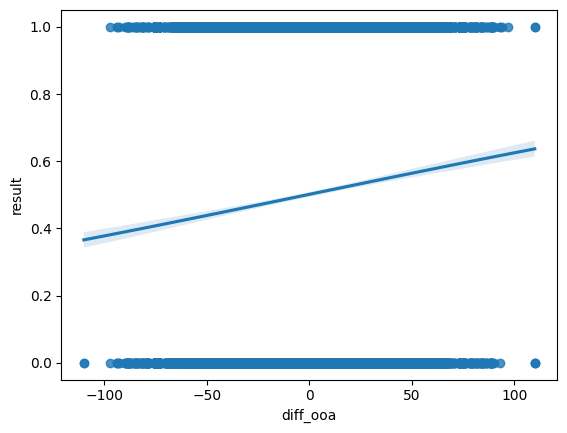

In [16]:
sns.regplot(x='diff_ooa', y='result', data = df, logistic=True)

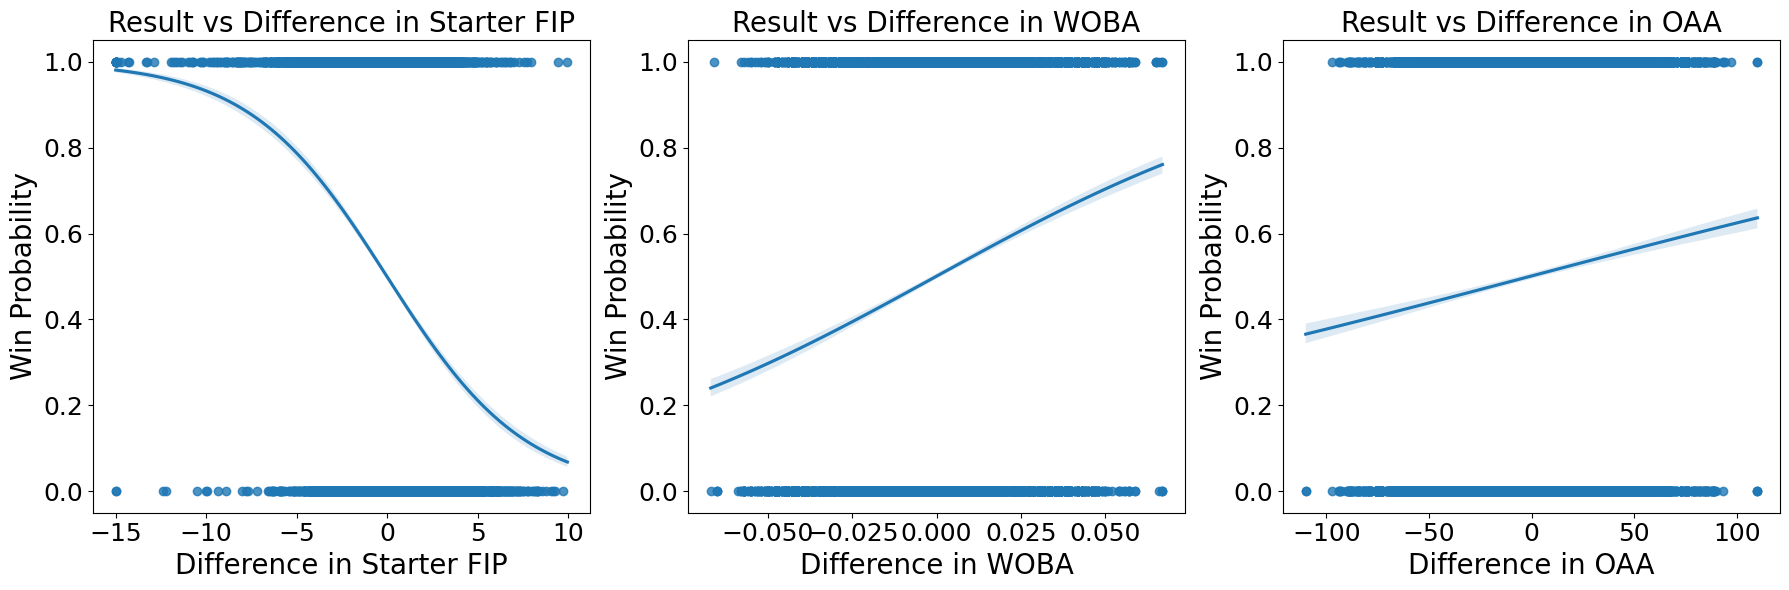

In [29]:
features = ['diff_opener_fip', 'diff_woba', 'diff_ooa']
xlabels = ['Difference in Starter FIP', 'Difference in WOBA', 'Difference in OAA']

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, feat, lab in zip(axs, features, xlabels):
    sns.regplot(
        x=feat,
        y=target,
        data=df,
        logistic=True,
        ax=ax
    )
    ax.set_xlabel(lab, fontsize=20)
    ax.set_ylabel("Win Probability", fontsize=20)
    ax.set_title(f"Result vs {lab}", fontsize=20)
    ax.tick_params(axis='both', labelsize=18)

plt.tight_layout()
plt.show()

## Hex bin

<Axes: xlabel='1_opener_fip', ylabel='2_opener_fip'>

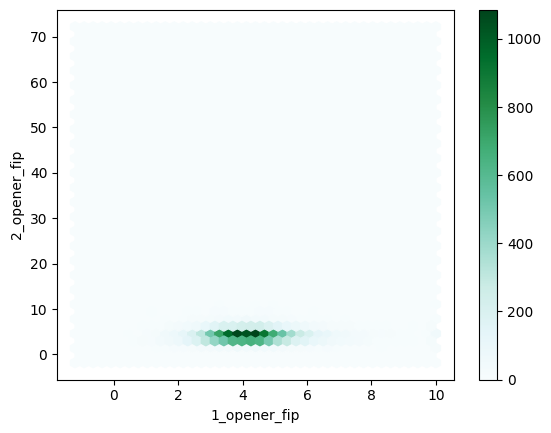

In [17]:
df.plot.hexbin('1_opener_fip','2_opener_fip',gridsize=40)

## Home vs Away

<Figure size 800x500 with 0 Axes>

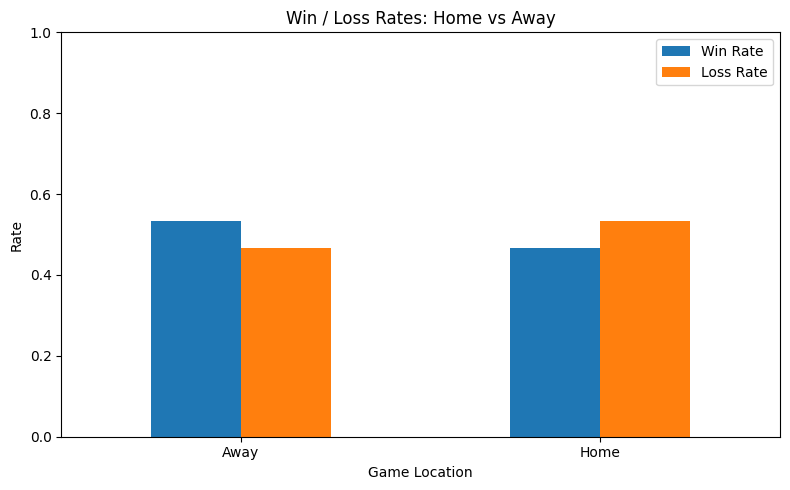

In [19]:

home_col = '1_home'
target = 'result'

summary = df.groupby(home_col)[target].agg(['mean', 'count'])
summary.rename(columns={'mean': 'win_rate'}, inplace=True)

summary['loss_rate'] = 1 - summary['win_rate']

summary.index = summary.index.map({0: 'Away', 1: 'Home'})


plt.figure(figsize=(8, 5))
summary[['win_rate', 'loss_rate']].plot(kind='bar', figsize=(8,5))

plt.title('Win / Loss Rates: Home vs Away')
plt.ylabel('Rate')
plt.xlabel('Game Location')
plt.xticks(rotation=0)
plt.legend(['Win Rate', 'Loss Rate'])
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
